# 1. Извлечение списка URL

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  
plt.close('all')

In [2]:
url = 'http://kremlin.ru/events/president/transcripts/messages'

In [3]:
resp = requests.get(url)

In [4]:
soup = BeautifulSoup(resp.text, 'lxml')

In [5]:
ResultSet = soup.find_all('h3', {'class': 'hentry__title hentry__title_special'})
ResultSet

[<h3 class="hentry__title hentry__title_special"> <a href="/events/president/transcripts/messages/62582" itemprop="url" rel="bookmark"><span class="entry-title p-name" itemprop="name">Послание Президента Федеральному Собранию</span> <span class="hentry__meta"> <time class="published dt-published" datetime="2020-01-15" itemprop="datePublished">15 января 2020 года, 13:15</time> <span class="updated hidden" hidden="hidden">2020-01-28</span> <span class="author vcard hidden" hidden="hidden"><span class="fn">Отдел редакции официального сайта Президента России</span></span> <span class="hentry__location p-location">Москва</span> </span> </a> </h3>,
 <h3 class="hentry__title hentry__title_special"> <a href="/events/president/transcripts/messages/59863" itemprop="url" rel="bookmark"><span class="entry-title p-name" itemprop="name">Послание Президента Федеральному Собранию</span> <span class="hentry__meta"> <time class="published dt-published" datetime="2019-02-20" itemprop="datePublished">20 ф

In [6]:
url_list = []
date_list = []
for h3_title in ResultSet:
    url_list.append('http://kremlin.ru' + h3_title.find('a').attrs['href'])
    datetime = h3_title.find('time', {'class': 'published dt-published'})
    date_list.append(datetime.attrs['datetime'])

In [7]:
url_list

['http://kremlin.ru/events/president/transcripts/messages/62582',
 'http://kremlin.ru/events/president/transcripts/messages/59863',
 'http://kremlin.ru/events/president/transcripts/messages/56957',
 'http://kremlin.ru/events/president/transcripts/messages/53379',
 'http://kremlin.ru/events/president/transcripts/messages/50864',
 'http://kremlin.ru/events/president/transcripts/messages/47173',
 'http://kremlin.ru/events/president/transcripts/messages/19825',
 'http://kremlin.ru/events/president/transcripts/messages/17118',
 'http://kremlin.ru/events/president/transcripts/messages/14088',
 'http://kremlin.ru/events/president/transcripts/messages/9637',
 'http://kremlin.ru/events/president/transcripts/messages/5979',
 'http://kremlin.ru/events/president/transcripts/messages/1968']

In [8]:
date_list

['2020-01-15',
 '2019-02-20',
 '2018-03-01',
 '2016-12-01',
 '2015-12-03',
 '2014-12-04',
 '2013-12-12',
 '2012-12-12',
 '2011-12-22',
 '2010-11-30',
 '2009-11-12',
 '2008-11-05']

In [9]:
dataset = pd.DataFrame()
dataset['link'] = url_list
dataset['data'] = date_list

In [10]:
dataset

,link,data
0,http://kremlin.ru/events/president/transcripts...,2020-01-15
1,http://kremlin.ru/events/president/transcripts...,2019-02-20
2,http://kremlin.ru/events/president/transcripts...,2018-03-01
3,http://kremlin.ru/events/president/transcripts...,2016-12-01
4,http://kremlin.ru/events/president/transcripts...,2015-12-03
5,http://kremlin.ru/events/president/transcripts...,2014-12-04
6,http://kremlin.ru/events/president/transcripts...,2013-12-12
7,http://kremlin.ru/events/president/transcripts...,2012-12-12
8,http://kremlin.ru/events/president/transcripts...,2011-12-22
9,http://kremlin.ru/events/president/transcripts...,2010-11-30


# 2. Загрузка текстов посланий федеральному собранию

In [11]:
content_list= []
for num in range(0,len(date_list)):
    resp_message = requests.get(url_list[num])
    soup_message = BeautifulSoup(resp_message.text, 'lxml')
    content = soup_message.find('div', {'class': 'entry-content e-content read__internal_content'})
    content_list.append(content)

In [12]:
dataset['content'] = content_list

In [13]:
dataset

,link,data,content
0,http://kremlin.ru/events/president/transcripts...,2020-01-15,"<div class=""entry-content e-content read__inte..."
1,http://kremlin.ru/events/president/transcripts...,2019-02-20,"<div class=""entry-content e-content read__inte..."
2,http://kremlin.ru/events/president/transcripts...,2018-03-01,"<div class=""entry-content e-content read__inte..."
3,http://kremlin.ru/events/president/transcripts...,2016-12-01,"<div class=""entry-content e-content read__inte..."
4,http://kremlin.ru/events/president/transcripts...,2015-12-03,"<div class=""entry-content e-content read__inte..."
5,http://kremlin.ru/events/president/transcripts...,2014-12-04,"<div class=""entry-content e-content read__inte..."
6,http://kremlin.ru/events/president/transcripts...,2013-12-12,"<div class=""entry-content e-content read__inte..."
7,http://kremlin.ru/events/president/transcripts...,2012-12-12,"<div class=""entry-content e-content read__inte..."
8,http://kremlin.ru/events/president/transcripts...,2011-12-22,"<div class=""entry-content e-content read__inte..."
9,http://kremlin.ru/events/president/transcripts...,2010-11-30,"<div class=""entry-content e-content read__inte..."


In [14]:
#print(dataset['content'][0].text)

# 3. Анализ

In [18]:
spech_len = []

In [19]:
for i in dataset['content']:
    spech_len.append(len(i.text))
    print(len(i.text))

56852
72393
96618
57977
50328
53046
61645
72629
51744
55298
76992
65895


In [20]:
dataset['spech_len'] = spech_len

In [21]:
dataset

,link,data,content,spech_len
0,http://kremlin.ru/events/president/transcripts...,2020-01-15,"<div class=""entry-content e-content read__inte...",56852
1,http://kremlin.ru/events/president/transcripts...,2019-02-20,"<div class=""entry-content e-content read__inte...",72393
2,http://kremlin.ru/events/president/transcripts...,2018-03-01,"<div class=""entry-content e-content read__inte...",96618
3,http://kremlin.ru/events/president/transcripts...,2016-12-01,"<div class=""entry-content e-content read__inte...",57977
4,http://kremlin.ru/events/president/transcripts...,2015-12-03,"<div class=""entry-content e-content read__inte...",50328
5,http://kremlin.ru/events/president/transcripts...,2014-12-04,"<div class=""entry-content e-content read__inte...",53046
6,http://kremlin.ru/events/president/transcripts...,2013-12-12,"<div class=""entry-content e-content read__inte...",61645
7,http://kremlin.ru/events/president/transcripts...,2012-12-12,"<div class=""entry-content e-content read__inte...",72629
8,http://kremlin.ru/events/president/transcripts...,2011-12-22,"<div class=""entry-content e-content read__inte...",51744
9,http://kremlin.ru/events/president/transcripts...,2010-11-30,"<div class=""entry-content e-content read__inte...",55298


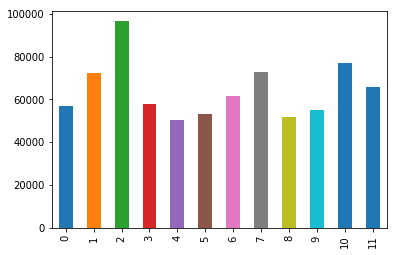

In [27]:
dataset['spech_len'].plot.bar(x='data');

In [29]:
dataset.index = range(2008,2020)

In [30]:
dataset

,link,data,content,spech_len
2008,http://kremlin.ru/events/president/transcripts...,2020-01-15,"<div class=""entry-content e-content read__inte...",56852
2009,http://kremlin.ru/events/president/transcripts...,2019-02-20,"<div class=""entry-content e-content read__inte...",72393
2010,http://kremlin.ru/events/president/transcripts...,2018-03-01,"<div class=""entry-content e-content read__inte...",96618
2011,http://kremlin.ru/events/president/transcripts...,2016-12-01,"<div class=""entry-content e-content read__inte...",57977
2012,http://kremlin.ru/events/president/transcripts...,2015-12-03,"<div class=""entry-content e-content read__inte...",50328
2013,http://kremlin.ru/events/president/transcripts...,2014-12-04,"<div class=""entry-content e-content read__inte...",53046
2014,http://kremlin.ru/events/president/transcripts...,2013-12-12,"<div class=""entry-content e-content read__inte...",61645
2015,http://kremlin.ru/events/president/transcripts...,2012-12-12,"<div class=""entry-content e-content read__inte...",72629
2016,http://kremlin.ru/events/president/transcripts...,2011-12-22,"<div class=""entry-content e-content read__inte...",51744
2017,http://kremlin.ru/events/president/transcripts...,2010-11-30,"<div class=""entry-content e-content read__inte...",55298
